In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
%config InlineBackend.figure_format = 'retina'
import scipy.stats
import seaborn as sns

In [2]:
subj_list_GA = [
    'GA01', 'GA02', 'GA05', 'GA07', 'GA08', 'GA11', 'GA12', 'GA13', 'GA14', 'GA15',
    'GA18', 'GA19', 'GA20', 'GA21', 'GA23', 'GA26', 'GA27', 'GA28', 'GA29', 'GA30',
    'GA31', 'GA32', 'GA33', 'GA34', 'GA35', 'GA36', 'GA37', 'GA38', 'GA42', 'GA44',
]

In [3]:
sequence_time = {}

for subj in subj_list_GA:
    for run in [1, 2, 3, 4, 5]:
        content = scipy.io.loadmat('/Volumes/clmnlab/GA/behavior_data/%s/%s-%d-behav.mat' % (subj, subj, run))
        track_time = content['track_time']
        sequence_time[subj, run] = track_time

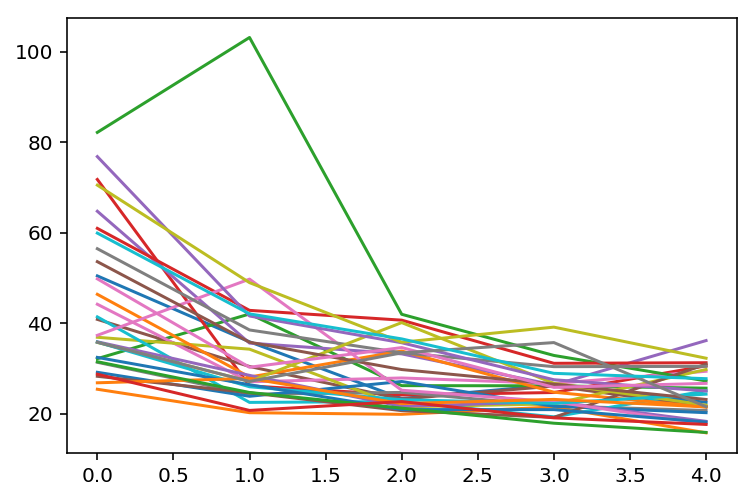

In [9]:
for subj in subj_list_GA:
    times = []
    for run in [1, 2, 3, 4, 5]:
        assert sequence_time[subj, run].shape == (1, 16)
        times.append(np.mean(sequence_time[subj, run]))
    
    plt.plot(times)

In [54]:
time_1st = []
time_5th = []

for subj in subj_list_GA:
    time_1st.append(np.sum(sequence_time[subj, 1]))
    time_5th.append(np.sum(sequence_time[subj, 5]))

In [55]:
scipy.stats.ttest_rel(time_1st, time_5th)

Ttest_relResult(statistic=8.434091799937454, pvalue=2.704256940572743e-09)

In [59]:
lines = []

for subj in subj_list_GA:
    for run in [1, 2, 3, 4, 5]:
        lines.append((subj, 'Behav %d' % run, np.sum(sequence_time[subj, run])))
    
df = pd.DataFrame(lines, columns=['Subject', 'Session', 'Time to complete (sec)'])
df.head()

,Subject,Session,Time to complete (sec)
0,GA01,Behav 1,807.212
1,GA01,Behav 2,574.028
2,GA01,Behav 3,373.529
3,GA01,Behav 4,421.905
4,GA01,Behav 5,359.850


In [63]:
import matplotlib

matplotlib.rcParams['font.sans-serif'] = "Arial"

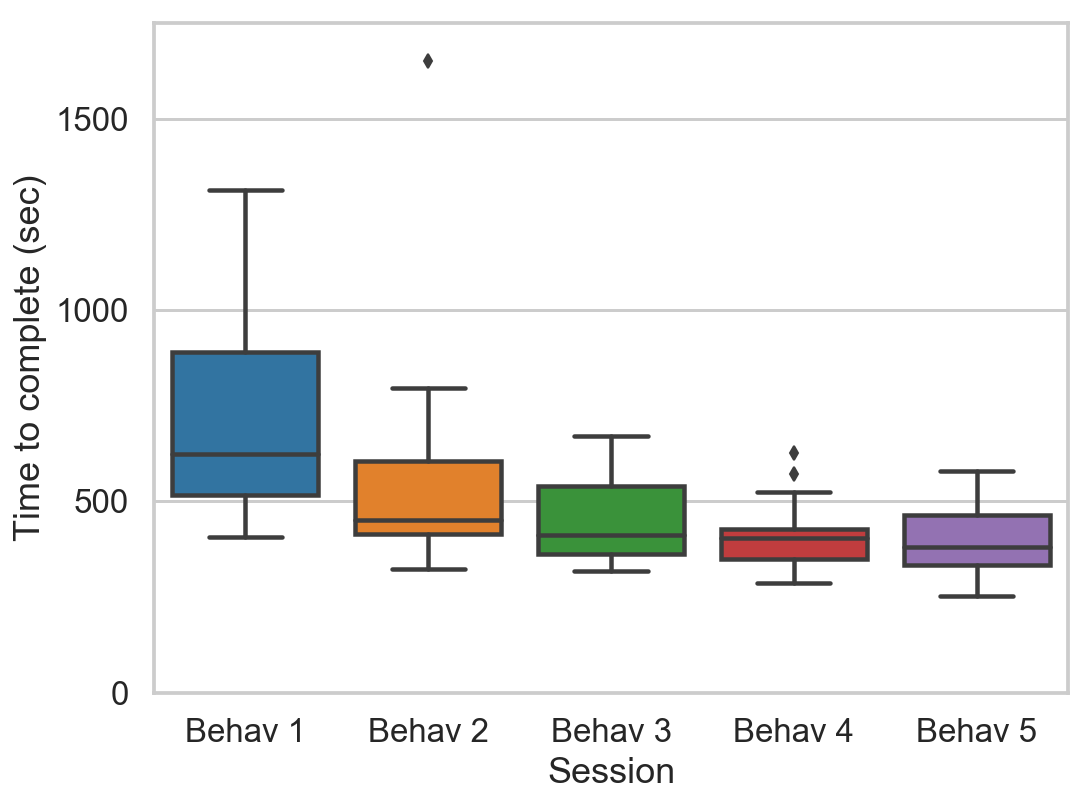

In [101]:
sns.set_style('whitegrid')
sns.set_context('talk')

fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x='Session', y='Time to complete (sec)', data=df, ax=ax)
plt.ylim(0, 1750)
plt.yticks(np.arange(0, 2000, 500))
#sns.despine()
plt.tight_layout()

In [45]:
fig.savefig('20200512_figure_s3.png', dpi=300)

(array([5., 8., 4., 2., 3., 1., 3., 1., 1., 2.]),
 array([25.3873125 , 31.06611875, 36.744925  , 42.42373125, 48.1025375 ,
        53.78134375, 59.46015   , 65.13895625, 70.8177625 , 76.49656875,
        82.175375  ]),
 <a list of 10 Patch objects>)

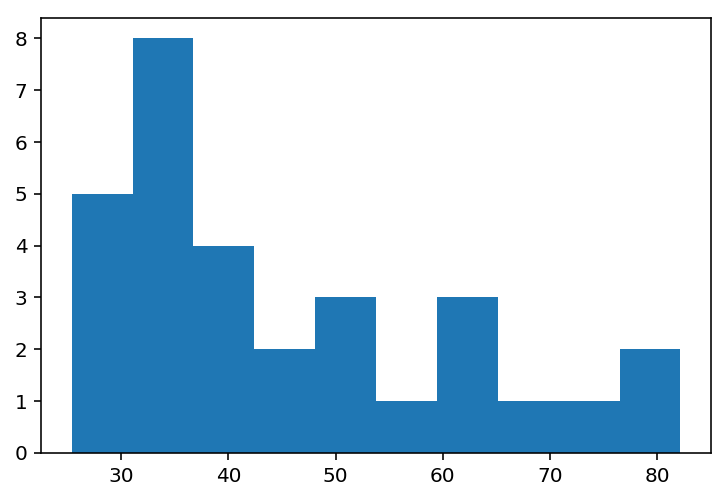

In [50]:
plt.hist(time_1st)

(array([4., 2., 6., 3., 4., 3., 2., 4., 1., 1.]),
 array([15.752875  , 17.79274375, 19.8326125 , 21.87248125, 23.91235   ,
        25.95221875, 27.9920875 , 30.03195625, 32.071825  , 34.11169375,
        36.1515625 ]),
 <a list of 10 Patch objects>)

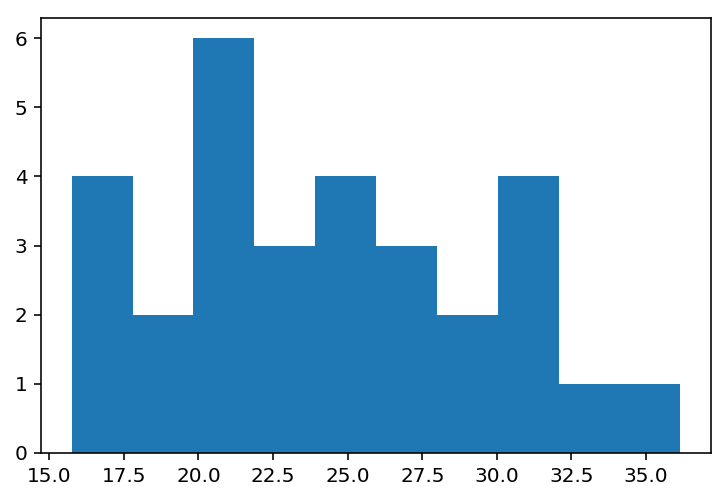

In [51]:
plt.hist(time_5th)

In [56]:
scipy.stats.wilcoxon([a-b for a, b in zip(time_1st, time_5th)])

WilcoxonResult(statistic=1.0, pvalue=1.9209211049031396e-06)

In [58]:
scipy.stats.wilcoxon(time_1st, time_5th)

WilcoxonResult(statistic=1.0, pvalue=1.9209211049031396e-06)